In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv")

In [3]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.info()   #to check the datatypes helpful to calculate the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
 #statstical summary of the dataset
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [8]:
#Fill the Null Values
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [9]:
#they are checking Null Values
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
data=data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


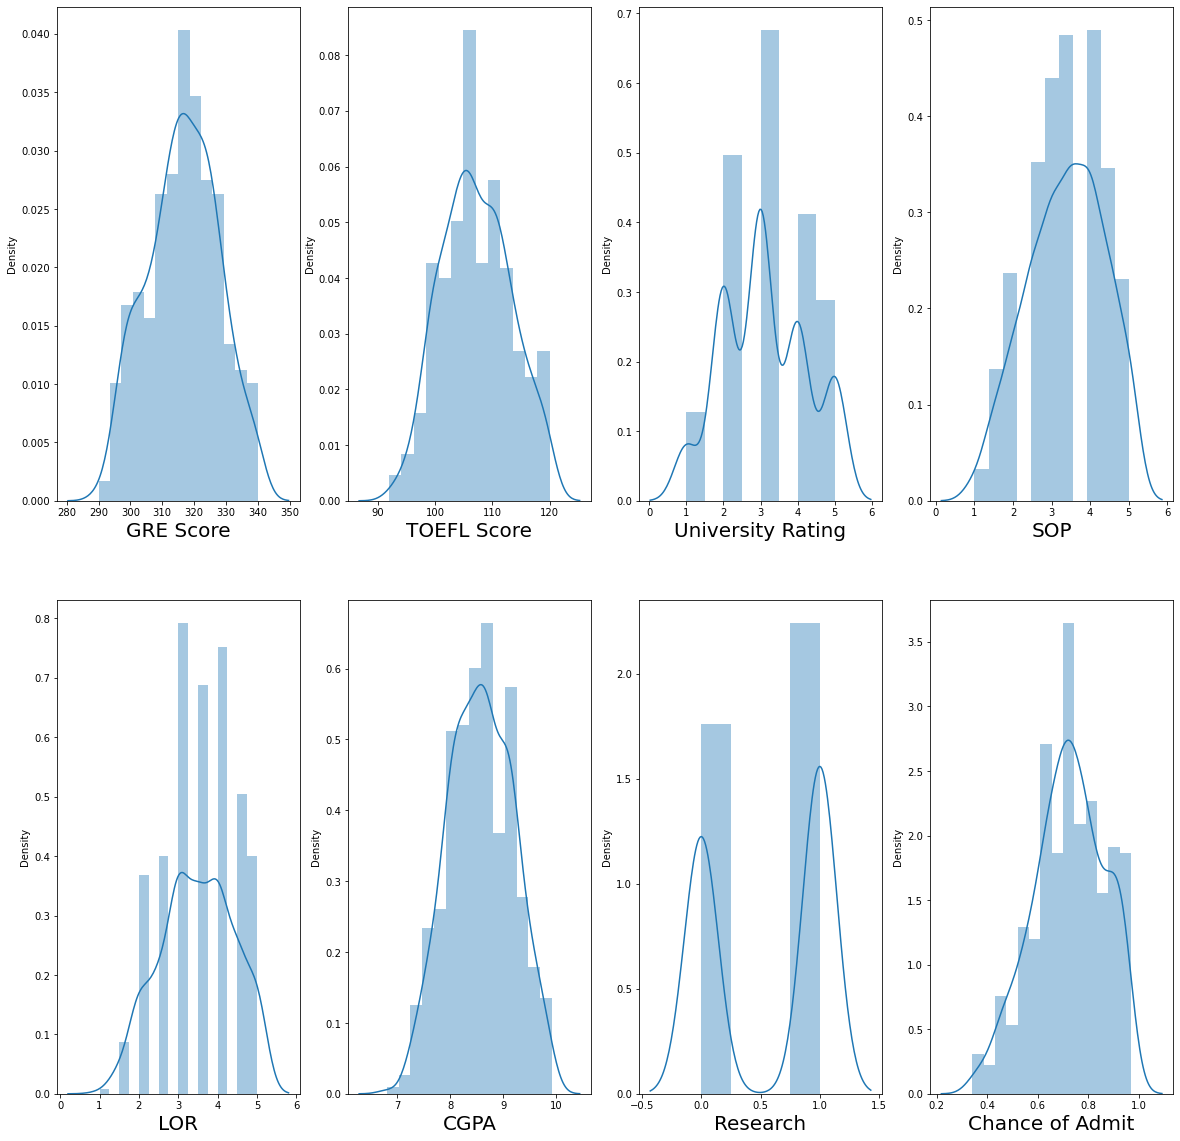

In [11]:
#lets's see how data is distributed for every columns

plt.figure(figsize=(20,20),facecolor='white')
plotnumber= 1

for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [12]:
#divided the data into feature and label
x=data.drop(columns=['Chance of Admit'])
y=data['Chance of Admit']

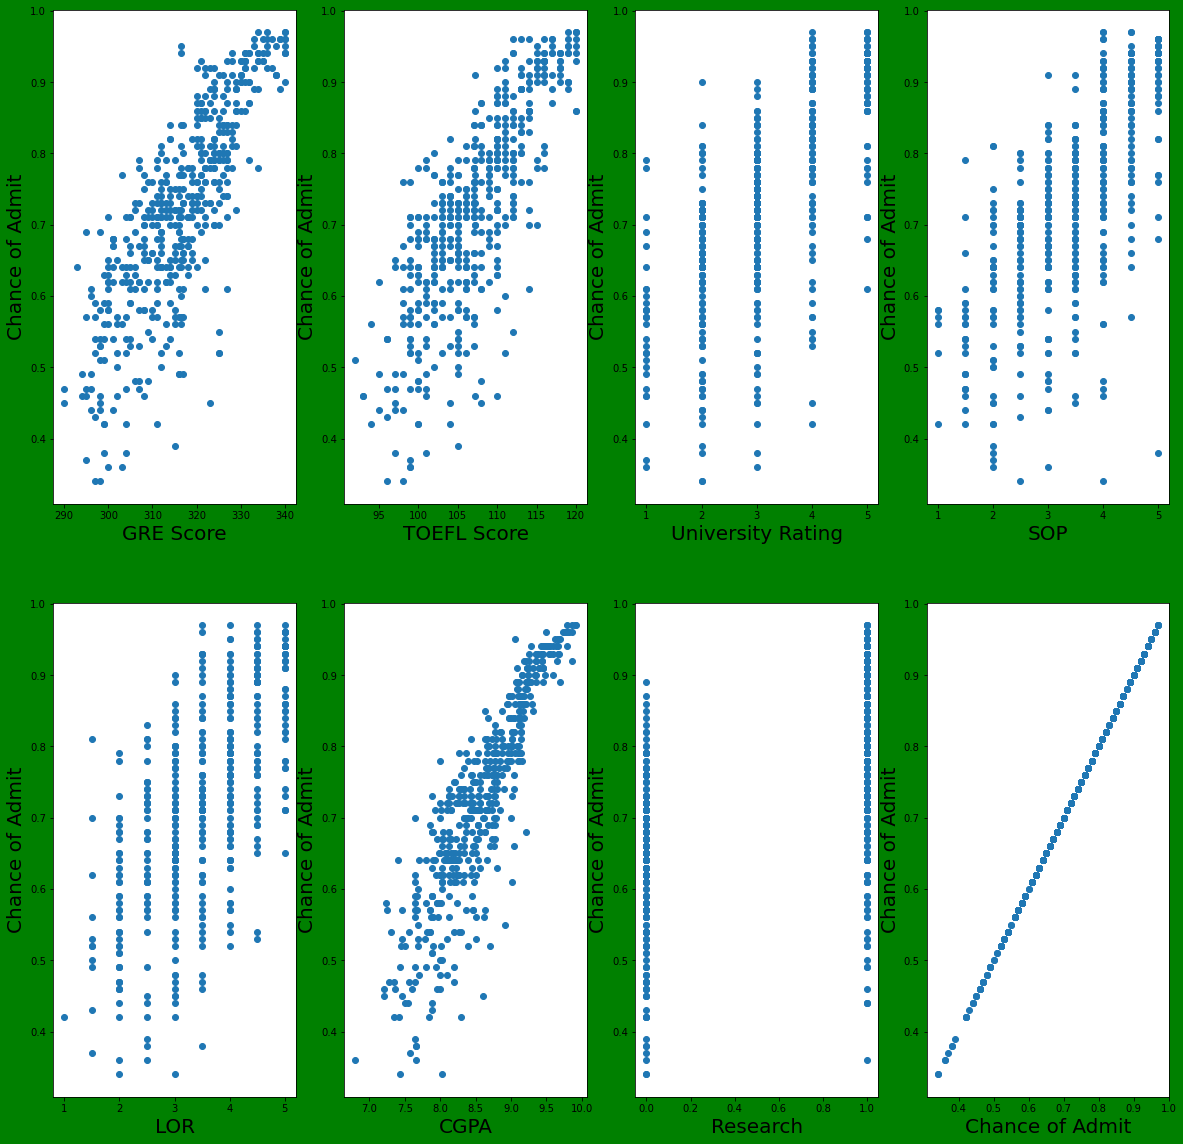

In [13]:
#Visulize the relationship
plt.figure(figsize=(20,20),facecolor='green')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(data[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
X_Scaled=Scaler.fit_transform(x)
X_Scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [15]:
#split the data in training and test data
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=.25,random_state=323)


#Model Instantitiating and Training

In [16]:

lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
#Predict the chance of admission given features
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [21]:
print('Chance of Admission is ', lr.predict(Scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is  [0.82689498]


In [24]:
#you can save the model and you can use it for prediction
filename = 'finalized_model.pickle'
pickle.dump(lr,open(filename,'wb'))

#prediction using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(Scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))
a

array([0.82689498])

In [25]:
#adjusted R2 score
lr.score(x_train,y_train)

0.8219512009081209

In [26]:
#let's check how well model fits the test data
lr.score(x_test,y_test)

0.8125809128540746

In [27]:
y_pred=lr.predict(x_test)
y_pred

array([0.72962282, 0.94684997, 0.64743246, 0.85308053, 0.84107013,
       0.78221847, 0.6106612 , 0.62446492, 0.82446077, 0.71827929,
       0.64798822, 0.79540446, 0.72911947, 0.50335167, 0.79205525,
       0.67869331, 0.51681922, 0.5769851 , 0.59484473, 0.82515732,
       0.78626585, 0.70727203, 0.60623517, 0.78739986, 0.78476073,
       0.85453737, 0.78162541, 0.58240106, 0.58323503, 0.72999217,
       0.68156254, 0.58627739, 0.5625913 , 0.7729838 , 0.65233795,
       0.62597992, 0.61721882, 0.76158331, 0.56214794, 0.83264717,
       0.75649261, 0.74754109, 0.62673314, 0.62605173, 0.9204128 ,
       0.70026047, 0.75127863, 0.63426177, 0.88137973, 0.99902269,
       0.60666463, 0.82387701, 0.88740287, 0.64678434, 0.76314902,
       0.72212229, 0.76349531, 0.49979327, 0.70701776, 0.87531165,
       0.48902332, 0.5994108 , 0.88167209, 0.63639462, 0.70772436,
       0.53824566, 0.70796217, 0.58568258, 0.7866568 , 0.76087021,
       0.77679018, 0.64071523, 0.90724871, 0.93808451, 0.88494

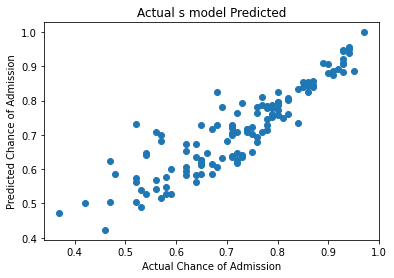

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual s model Predicted')
plt.show()

#Eror Metrics
Mean Absolute eror
Mean Square eror
root mean squared eror

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [34]:
y_pred=lr.predict(x_test)

In [35]:
mean_absolute_error(y_test,y_pred)

0.04350796028272816

In [37]:
mean_squared_error(y_test,y_pred)

0.00330589997182341

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.05749695619616233

In [41]:
#Lasso Regularization #learning rate ,it will give learning rate
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lasscv=LassoCV(alphas = None,max_iter=1000,normalize =True)
lasscv.fit(x_train,y_train)



LassoCV(normalize=True)

In [43]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

2.3018456324880496e-05

In [44]:
#now tat we have best parameter, let's use lasso regression andsee how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.3018456324880496e-05)

In [45]:
lasso_reg.score(x_test,y_test)

0.8125935793919129

In [47]:
# RidgeCV Will return bes alpha and coeffcients after performin 10 cross validations

ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize =True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [48]:
ridgecv.alpha_

0.011

In [49]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.011)

In [50]:
ridge_model.score(x_test,y_test)

0.8125804518999469